### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()
data.sample(15)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [9]:
# Data cleaning
data.head()
data.sample(15)
data.info()

# From "data.info()" summary,
# 1) The "Y" column [response = 1 or 0] has no missing values (12684 non Null values).
# 2) the "Bar" column has 107 missing vaues (1264 - 12577).
# Action: first, remove missing (NaN) data in "Bar" column

data_filtered_Bar = data.loc[ data["Bar"].notnull() ]             
data_filtered_Bar

# --- The "data_filtered_Bar" filtered data will be used for analysis that follow.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
#  drop missing data in "Y" column

data_filtered_Bar = data.loc[ data["Bar"].notnull() ]             
data_filtered_Bar


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?


In [13]:
#  % proportion of drivers accepted coupon

# -- Driver Acceptance rate of coupoon
# "Y" = 1, response = 56.9%
# "Y" = 0, response = 43.1%

couponY = data_filtered_Bar['Y'].value_counts(normalize = True)
couponY


Y
1    0.568896
0    0.431104
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Fig 1: Coupon acceptance rate for nearby restaurant')

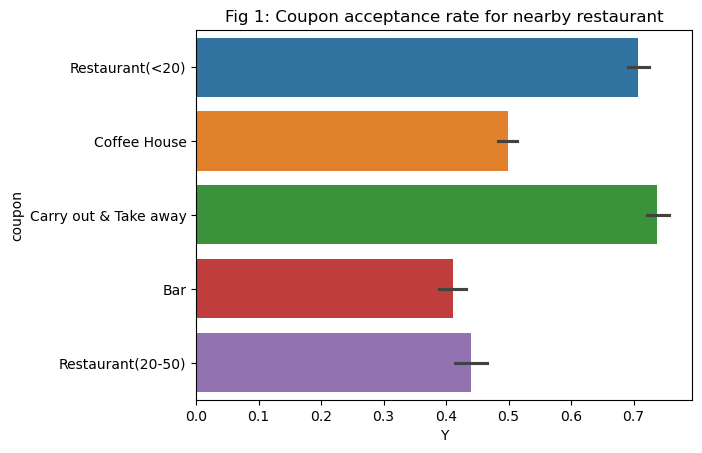

In [15]:
# --- Visualization with Bar plot for "Coupon" column

# -- Observations:
# Fig 1: The Bar plot shows highest response rate for "Restaurant(<20)" and "carry out& Takeout" coupons, followed by "coffee house".
# coupons for "Bar" coupons ranked the lowest.

sns.barplot(data_filtered_Bar, x = "Y", y = "coupon", hue="coupon")
plt.title('Fig 1: Coupon acceptance rate for nearby restaurant')


6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Fig 2: Temperatures on Coupon acceptance rate')

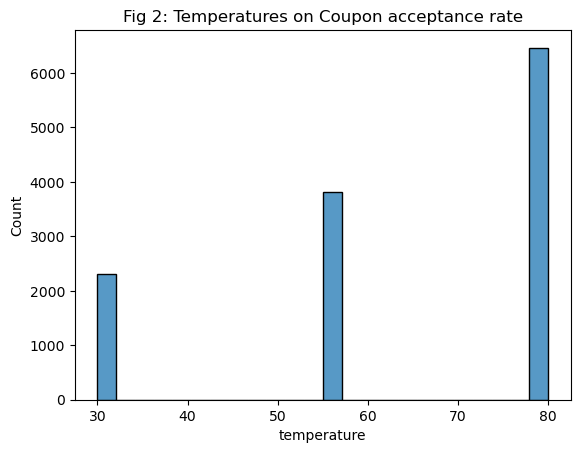

In [17]:
# --- Visualization with Histogram plot

sns.histplot(data=data_filtered_Bar, x="temperature")
plt.title('Fig 2: Temperatures on Coupon acceptance rate')

#  -- Observations:
# The data shows more 80degree days, followed by 55degrees, and then 30degrees


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
# A new DataFrame that contains just the "bar" coupons.
# 
dataBarCoupons = data_filtered_Bar.loc[data_filtered_Bar["coupon"] == "Bar"]

dataBarCoupons.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9216,Home,Partner,Sunny,55,10PM,Bar,1d,Male,26,Single,...,never,4~8,4~8,less1,1,1,1,0,1,0
8925,Home,Alone,Rainy,55,6PM,Bar,1d,Male,36,Single,...,less1,less1,4~8,less1,1,1,1,0,1,0
6495,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,36,Unmarried partner,...,4~8,4~8,1~3,1~3,1,0,0,0,1,0
1712,Home,Alone,Sunny,55,6PM,Bar,1d,Female,26,Married partner,...,less1,1~3,1~3,never,1,0,0,1,0,0
10831,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Single,...,gt8,4~8,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [21]:
# proportion of "bar" coupons were accepted
# 
couponBarY = dataBarCoupons['Y'].value_counts(normalize = True)
couponBarY

# -- Acceptance rate of "bar" coupoon
# "Y" = 1, response = 58.9%
# "Y" = 0, response = 41.1%

Y
0    0.589679
1    0.410321
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:
# -- Observations: the Acceptance rate is almost the same for the 2 scenarios considered below.

# -- Acceptance rate of "Bar" coupon for 3 or less times
visitBar_3orLess = dataBarCoupons.loc[data["Bar"] < "4"]
couponYes = visitBar_3orLess['Y'].value_counts(normalize = True)
couponYes
# "Y" = 1, response = 64.7%
# "Y" = 0, response = 35.3%


# -- Acceptance rate of "Bar" coupon 4 or more times
visitBar_4orMore = dataBarCoupons.loc[data["Bar"] > "3"]
couponYes = visitBar_4orMore['Y'].value_counts(normalize = True)
couponYes
# "Y" = 1, response = 64.9%
# "Y" = 0, response = 35.1%

Y
0    0.64853
1    0.35147
Name: proportion, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
# -- Observations: the Acceptance rate is higher for "above 25yrs olds" compared to "all others" as noted below.

visitBar_1plus_over_25yrs = dataBarCoupons.loc[(data["Bar"] > "1") & (data["age"] > "25")]
visitBar_1plus_over_25yrs
visitBar_1plus_over_25yrs.sample(10)

couponYes = visitBar_1plus_over_25yrs['Y'].value_counts(normalize = True)
couponYes

# "Y" = 1, response = 61.5%
# "Y" = 0, response = 38.5%

# --------- compare ABOVE vs. BELOW ------------

visitBar_1orLess_atmost_25yrs = dataBarCoupons.loc[(data["Bar"] < "2") | (data["age"] < "26")]
visitBar_1orLess_atmost_25yrs
visitBar_1orLess_atmost_25yrs.sample(10)

couponYes = visitBar_1orLess_atmost_25yrs['Y'].value_counts(normalize = True)
couponYes

# "Y" = 1, response = 56.7%
# "Y" = 0, response = 43.3%

Y
1    0.566572
0    0.433428
Name: proportion, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [27]:
# -- Observations: the Acceptance rate for "drivers who go to bars more than once a month and had passengers 
# -- that were not a kid and had occupations other than farming, fishing, or forestry"
# -- is less than "above 25yrs olds" criteria in #4) above  
# -- and is equal to "all others" criteria in #4) above.
# --
visitBar_Times1plus_noKids_Non_FarmFishForest = dataBarCoupons.loc[(dataBarCoupons["Bar"] > "1") & (dataBarCoupons["passanger"] != "Kid(s)") & (dataBarCoupons["occupation"] != "Farming Fishing & Forestry")]
visitBar_Times1plus_noKids_Non_FarmFishForest
visitBar_Times1plus_noKids_Non_FarmFishForest.sample(10)

couponYes = visitBar_Times1plus_noKids_Non_FarmFishForest['Y'].value_counts(normalize = True)
couponYes

# "Y" = 1, response = 56.7%
# "Y" = 0, response = 43.3%

Y
0    0.566872
1    0.433128
Name: proportion, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [29]:
# -- Observations: the Acceptance rate for all 3 scenarios is documented following each scenario below.
# -- the highest rate for "cheap restaurants more than 4 times a month and income is less than 50K"
# -- the lowest rate for "more than once a month and are under the age of 30"
# 
visitBar_Times1plus_noKids_nonWidow = dataBarCoupons.loc[(dataBarCoupons["Bar"] > "1") & (dataBarCoupons["passanger"] != "Kid(s)") & (dataBarCoupons["maritalStatus"] != "Widowed")]
visitBar_Times1plus_noKids_nonWidow

couponYes = visitBar_Times1plus_noKids_nonWidow['Y'].value_counts(normalize = True)
couponYes
# "Y" = 1, response = 56.5%
# "Y" = 0, response = 43.5%

# ---
visitBar_Times1plus_under30 = dataBarCoupons.loc[(dataBarCoupons["Bar"] > "1") & (dataBarCoupons["age"] < "30") ]
visitBar_Times1plus_under30

couponYes = visitBar_Times1plus_under30['Y'].value_counts(normalize = True)
couponYes
# "Y" = 1, response = 50.4%
# "Y" = 0, response = 49.6%

# ---
visitBar_Times4plus_under50k = dataBarCoupons.loc[(dataBarCoupons["Bar"] > "4") & (dataBarCoupons["income"] < "50000") ]
visitBar_Times4plus_under50k

couponYes = visitBar_Times4plus_under50k['Y'].value_counts(normalize = True)
couponYes
# "Y" = 1, response = 65.3%
# "Y" = 0, response = 34.7%

Y
0    0.652797
1    0.347203
Name: proportion, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [31]:
# -- Overall Observations for "Bar" coupon:
# 
# -- Drivers who accepted the coupons:
# -- are generally 25+ yrs old,
# -- opt more often for low budget restaurant (< $20 range) including carry out& Takeouts,
# -- are low-income earners (< $50K)
# -- tend to do "carry out& Takeouts" more often than others
# -- tend to accept coupons more often on 80degree days


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [33]:
# -- Exploring acceptance Rate for "Carryout & take Away" coupons
# 
#  drop missing data in "Y" column
data_filtered_CarryAway = data.loc[ data["CarryAway"].notnull() ]             
data_filtered_CarryAway

#  % proportion of drivers accepted coupon -- Driver Acceptance rate of coupoon
# "Y" = 1, response = 56.7%
# "Y" = 0, response = 43.3%
couponY = data_filtered_CarryAway['Y'].value_counts(normalize = True)
couponY


# 3) -- Compare acceptance rate between those who went to "Carry away & take out" 3 or fewer times a month to those who went more
#  -- Observations: 

# -- Acceptance rate of "Carry away & take out" coupon for 3 or less times
visitCarryAway_3orLess = data_filtered_CarryAway.loc[data["Bar"] < "4"]
couponYes = visitCarryAway_3orLess['Y'].value_counts(normalize = True)
couponYes
# "Y" = 1, response = 62.4%
# "Y" = 0, response = 37.6%


# -- Acceptance rate of "Carry away & take out" coupon 4 or more times
visitCarryout_4orMore = data_filtered_CarryAway.loc[data["Bar"] > "3"]
couponYes = visitCarryout_4orMore['Y'].value_counts(normalize = True)
couponYes
# "Y" = 1, response = 55.5%
# "Y" = 0, response = 44.5%


Y
1    0.554637
0    0.445363
Name: proportion, dtype: float64

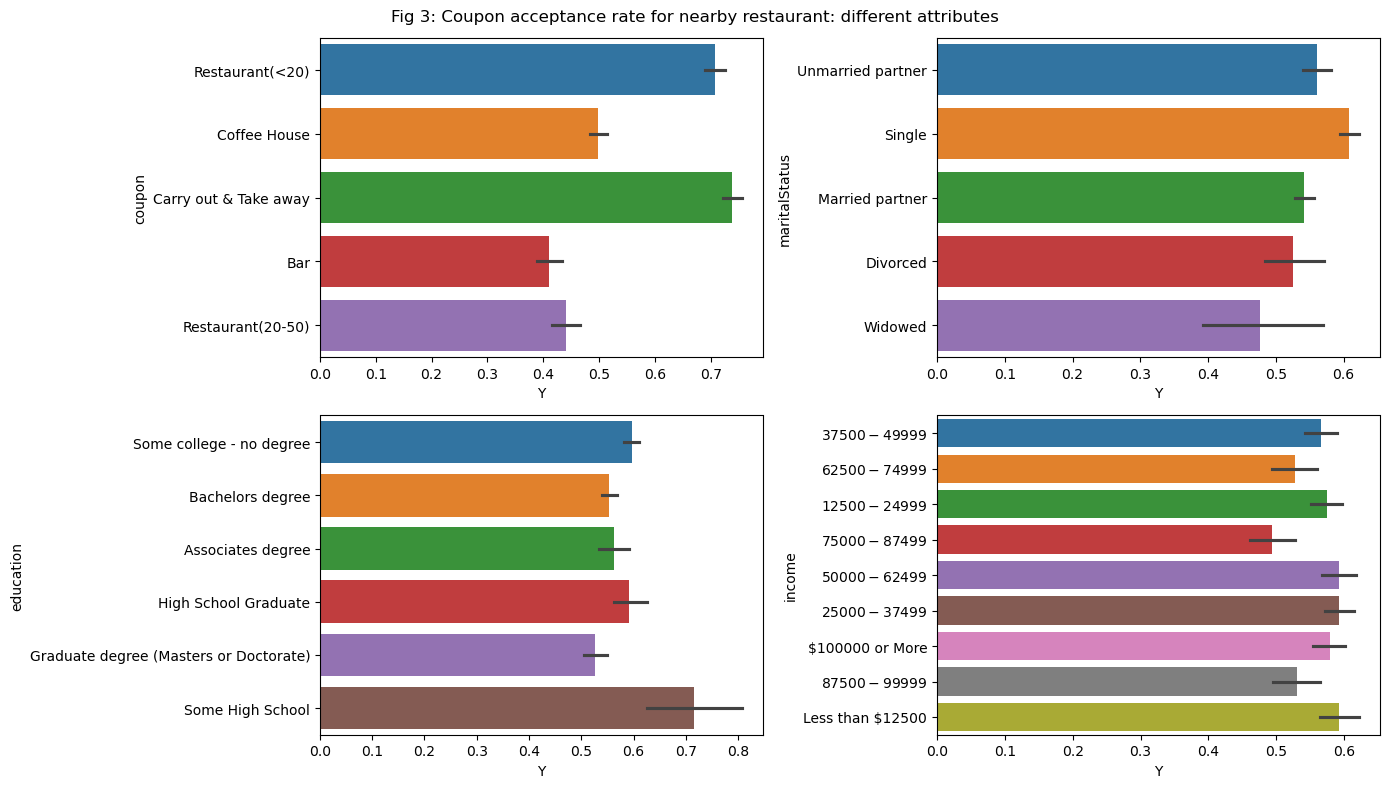

In [34]:
# -- Plots -- other "attributes" considered:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
sns.barplot(data_filtered_Bar, x = "Y", y = "coupon", hue="coupon", ax=axes[0, 0])
sns.barplot(data_filtered_Bar, x = "Y", y = "education", hue="education", ax=axes[1, 0])
sns.barplot(data_filtered_Bar, x = "Y", y = "income", hue="income", ax=axes[1, 1])
sns.barplot(data_filtered_Bar, x = "Y", y = "maritalStatus", hue="maritalStatus", ax=axes[0, 1])

fig.suptitle('Fig 3: Coupon acceptance rate for nearby restaurant: different attributes')
plt.tight_layout()


In [35]:
# -- Plots ---

In [36]:
# -- Covariance Matrix
data_filtered_Bar = data.loc[ data["Bar"].notnull() ]             

BarCoupon_temp_cov = data_filtered_Bar.select_dtypes(include='number').cov()
BarCoupon_temp_cov

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,367.219441,-0.195266,0.0,-1.476042,-1.339507,0.777249,-0.777249,0.563946
has_children,-0.195266,0.242405,0.0,0.018808,-0.002207,-0.006323,0.006323,-0.011541
toCoupon_GEQ5min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
toCoupon_GEQ15min,-1.476042,0.018808,0.0,0.246149,0.052356,-0.062310,0.062310,-0.020170
toCoupon_GEQ25min,-1.339507,-0.002207,0.0,0.052356,0.105292,-0.025769,0.025769,-0.016589
direction_same,0.777249,-0.006323,0.0,-0.062310,-0.025769,0.169058,-0.169058,0.003204
direction_opp,-0.777249,0.006323,0.0,0.062310,0.025769,-0.169058,0.169058,-0.003204
Y,0.563946,-0.011541,0.0,-0.020170,-0.016589,0.003204,-0.003204,0.245273


In [37]:
# -- Correlation Matrix

BarCoupon_temp_corr = data_filtered_Bar.select_dtypes(include='number').corr()
BarCoupon_temp_corr

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.020696,NaN,-0.155252,-0.215420,0.098646,-0.098646,0.059422
has_children,-0.020696,1.000000,NaN,0.076998,-0.013816,-0.031235,0.031235,-0.047330
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155252,0.076998,NaN,1.000000,0.325214,-0.305450,0.305450,-0.082089
toCoupon_GEQ25min,-0.215420,-0.013816,NaN,0.325214,1.000000,-0.193145,0.193145,-0.103226
direction_same,0.098646,-0.031235,NaN,-0.305450,-0.193145,1.000000,-1.000000,0.015734
direction_opp,-0.098646,0.031235,NaN,0.305450,0.193145,-1.000000,1.000000,-0.015734
Y,0.059422,-0.047330,NaN,-0.082089,-0.103226,0.015734,-0.015734,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'temperature'),
  Text(1.5, 0, 'has_children'),
  Text(2.5, 0, 'toCoupon_GEQ5min'),
  Text(3.5, 0, 'toCoupon_GEQ15min'),
  Text(4.5, 0, 'toCoupon_GEQ25min'),
  Text(5.5, 0, 'direction_same'),
  Text(6.5, 0, 'direction_opp'),
  Text(7.5, 0, 'Y')])

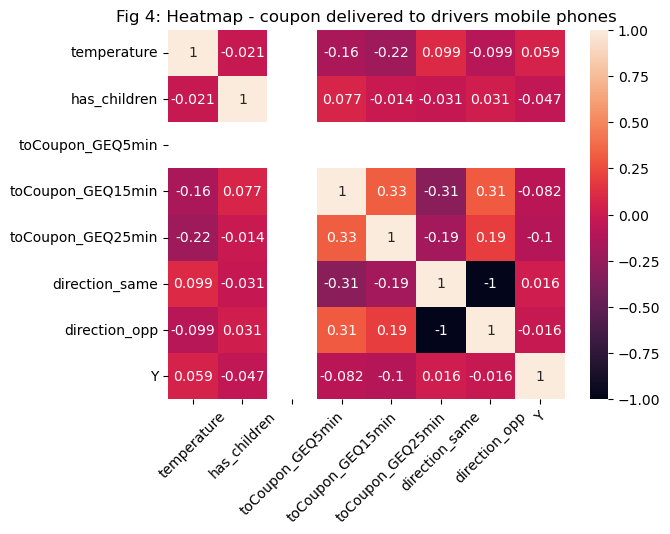

In [38]:
numeric_dataFrame = data_filtered_Bar.select_dtypes(include='number')
sns.heatmap(numeric_dataFrame.corr(), annot=True)
plt.title('Fig 4: Heatmap - coupon delivered to drivers mobile phones')
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Some college - no degree'),
  Text(1, 0, 'Bachelors degree'),
  Text(2, 0, 'Associates degree'),
  Text(3, 0, 'High School Graduate'),
  Text(4, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(5, 0, 'Some High School')])

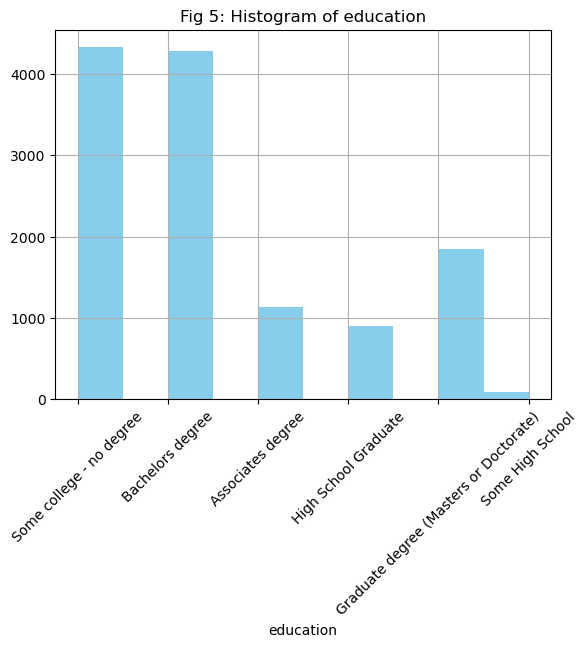

In [39]:
# -- CODE --

data_filtered_Bar["education"].hist(color='skyblue')
plt.title('Fig 5: Histogram of education')
plt.xlabel('education')
plt.xticks(rotation=45)


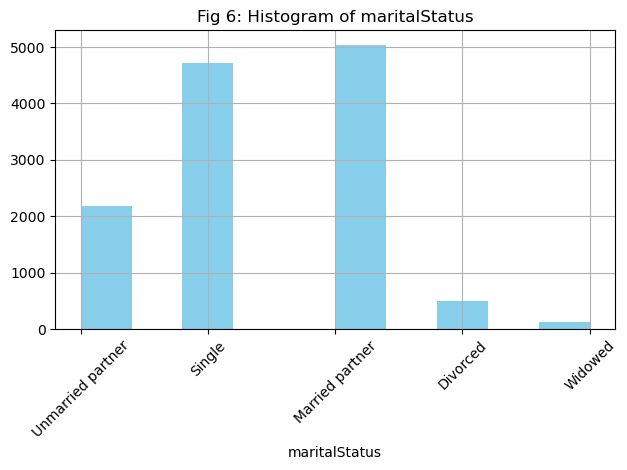

In [40]:
# -- CODE --

data_filtered_Bar["maritalStatus"].hist(color='skyblue')
plt.title('Fig 6: Histogram of maritalStatus')
plt.xlabel('maritalStatus')
plt.xticks(rotation=45)
plt.tight_layout()

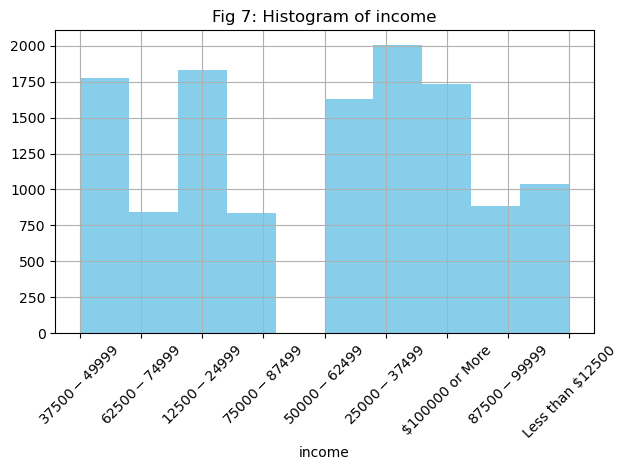

In [41]:
# -- CODE --

data_filtered_Bar["income"].hist(color='skyblue')
plt.title('Fig 7: Histogram of income')
plt.xlabel('income')
plt.xticks(rotation=45)
plt.tight_layout()

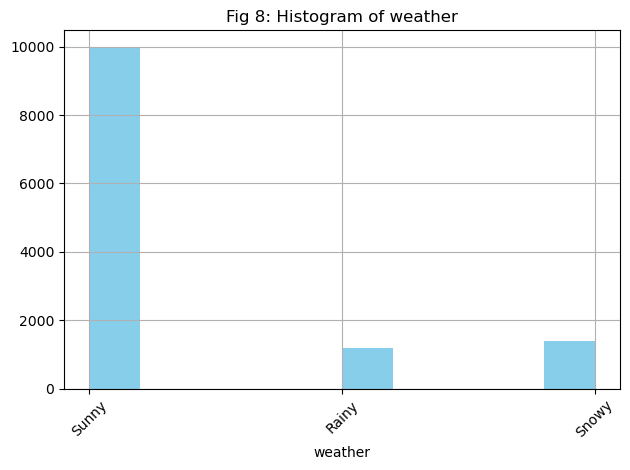

In [42]:
# -- CODE --

data_filtered_Bar["weather"].hist(color='skyblue')
plt.title('Fig 8: Histogram of weather')
plt.xlabel('weather')
plt.xticks(rotation=45)
plt.tight_layout()